In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from nltk.corpus import stopwords
df = pd.read_csv('IMDB Dataset.csv', delimiter=',')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [2]:
df['sentiment']=df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [3]:
df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
0          25000  24698  This show comes up with interesting locations ...   
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
0            3  
1            5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [5]:
df.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [6]:
df.columns

Index(['review', 'sentiment'], dtype='object')

/Users/SulMac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


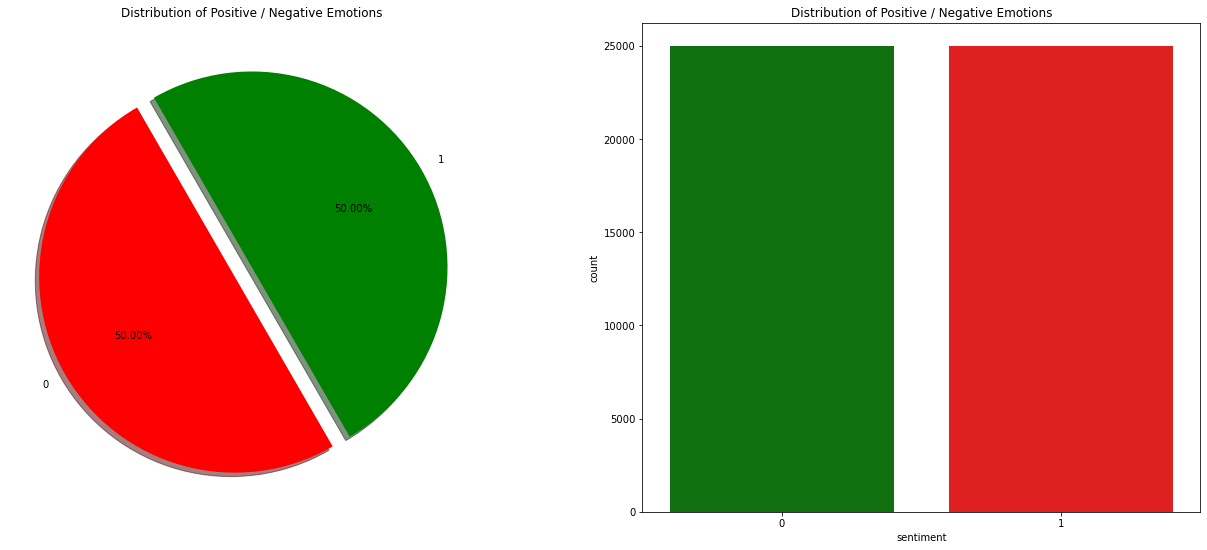

In [7]:
a , ax = plt.subplots(1,2,figsize=(22,9))
df['sentiment'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0],shadow=True, startangle=300, colors = ["green", "red"])
ax[0].set_title('Distribution of Positive / Negative Emotions')
ax[0].set_ylabel('')
sns.countplot('sentiment', data = df ,ax=ax[1], palette=["green", "red"])
ax[1].set_title('Distribution of Positive / Negative Emotions')
plt.show()

In [8]:
df.groupby(['sentiment'])[['sentiment']].count()


,sentiment
sentiment,
0,25000
1,25000


# Choosing a random review to preprocess

In [9]:
example_review = df.review[22]
example_review

"What an absolutely stunning movie, if you have 2.5 hrs to kill, watch it, you won't regret it, it's too much fun! Rajnikanth carries the movie on his shoulders and although there isn't anything more other than him, I still liked it. The music by A.R.Rehman takes time to grow on you but after you heard it a few times, you really start liking it."

# Cleaning the text from punctuation and numbers  using regex.

In [10]:

example_review = re.sub("[^a-zA-Z]",' ',example_review)
example_review

'What an absolutely stunning movie  if you have     hrs to kill  watch it  you won t regret it  it s too much fun  Rajnikanth carries the movie on his shoulders and although there isn t anything more other than him  I still liked it  The music by A R Rehman takes time to grow on you but after you heard it a few times  you really start liking it '

In [11]:
#Converting all the text to lower case to use it in ML algorithm
example_review = example_review.lower()
example_review

'what an absolutely stunning movie  if you have     hrs to kill  watch it  you won t regret it  it s too much fun  rajnikanth carries the movie on his shoulders and although there isn t anything more other than him  i still liked it  the music by a r rehman takes time to grow on you but after you heard it a few times  you really start liking it '

In [12]:
example_review = example_review.split()


In [13]:
words = set(stopwords.words("english")) # conversion into set for fast searching !!!
example_review = [word for word in example_review if word not in words]              
example_review

['absolutely',
 'stunning',
 'movie',
 'hrs',
 'kill',
 'watch',
 'regret',
 'much',
 'fun',
 'rajnikanth',
 'carries',
 'movie',
 'shoulders',
 'although',
 'anything',
 'still',
 'liked',
 'music',
 'r',
 'rehman',
 'takes',
 'time',
 'grow',
 'heard',
 'times',
 'really',
 'start',
 'liking']

# We will apply the preprocessing on the entire dataframe


In [14]:
def process(review):
    # review without punctuation and numbers
    review = re.sub("[^a-zA-Z]",' ',review)
    # converting into lowercase and splitting to eliminate stopwords
    review = review.lower()
    review = review.split()
    # review without stopwords
    swords = set(stopwords.words("english"))  # conversion into set for fast searching
    review = [w for w in review if w not in swords]               
    # splitted paragraph'ları space ile birleştiriyoruz return
    return(" ".join(review))

In [15]:
train_data = []
for i in range(len(df["review"])):        
    if (i+1)%2500 == 0:        
        print("Result =", i+1)
    train_data.append(process(df["review"][i]))

Result = 2500
Result = 5000
Result = 7500
Result = 10000
Result = 12500
Result = 15000
Result = 17500
Result = 20000
Result = 22500
Result = 25000
Result = 27500
Result = 30000
Result = 32500
Result = 35000
Result = 37500
Result = 40000
Result = 42500
Result = 45000
Result = 47500
Result = 50000


In [16]:
independent = train_data
dependent = np.array(df["sentiment"])

train_x, test_x, y_train, y_test = train_test_split(independent,dependent, stratify = dependent ,test_size = 0.2, shuffle = True , random_state = 25)

# Now we will do the vectorization as we mentioned in the slides

In [17]:
# # Using the countvectorizer function in sklearn, we create a bag of words with a maximum of 10.000 words...
vectorizer = CountVectorizer( max_features = 10000 )

# we convert our train data to feature vector matrix
train_x = vectorizer.fit_transform(train_x)

In [18]:
vectorizer
train_x


<40000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 3463659 stored elements in Compressed Sparse Row format>

In [19]:
#Converting it into an array to use it in the ML algorithm
train_x = train_x.toarray()
train_y = y_train

In [20]:
print("Total training data :", train_x.shape[0])
print("Total training data :", train_y.shape[0])

Total training data : 40000
Total training data : 40000


# Models Evaluation 

In [21]:
models = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Random Forest Classifier',RandomForestClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))


In [22]:
test_result = vectorizer.transform(test_x)
test_result = test_result.toarray()


In [ ]:
for name, model in models:

    %time model.fit(train_x, train_y)
    test_pred = model.predict(test_result)
    print(name ,'Accuracy Score : ',accuracy_score(y_test, test_pred))
    print(name ,'F1 Score : ',f1_score(y_test, test_pred, average='weighted'))
    print('__________________________________________________________________')
    

/Users/SulMac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 5min 36s, sys: 16min 52s, total: 22min 28s
Wall time: 25min 36s
Logistic Regression Accuracy Score :  0.8796
Logistic Regression F1 Score :  0.8795922939068099
__________________________________________________________________
